# AnyoneAI - Sprint Project 01
> E-Commerce Data Pipeline

In this notebook we will first execute all the components of our ELT pipeline and then plot visualizations with the resulting information.


In [1]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_ammount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

In [2]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

### 1. Extract

Here you will be extracting the information from different sources.

In [3]:
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

### 2. Load

Using the diferent datasets provided to you, you will store everything into our Data Warehouse.

In [4]:
load(data_frames=csv_dataframes, database=ENGINE)

### 3. Transform

Here you will be transforming the different queries into tables. There are two sections, one with the revenue related queries, and another with the delivery related queries.

In [5]:
from sqlalchemy import inspect

inspector = inspect(ENGINE)
tables = inspector.get_table_names()
print(tables)

['olist_customers', 'olist_geolocation', 'olist_order_items', 'olist_order_payments', 'olist_order_reviews', 'olist_orders', 'olist_products', 'olist_sellers', 'product_category_name_translation', 'public_holidays']


In [6]:
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)
delivery_date_difference = query_results["delivery_date_difference"]
freight_value_weight_relationship = query_results["get_freight_value_weight_relationship"]
print(query_results.keys())


dict_keys(['delivery_date_difference', 'global_ammount_order_status', 'revenue_by_month_year', 'revenue_per_state', 'top_10_least_revenue_categories', 'top_10_revenue_categories', 'real_vs_estimated_delivered_time', 'orders_per_day_and_holidays_2017', 'get_freight_value_weight_relationship'])


In [7]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Jan,0.00,38708.63,993588.74
1,02,Feb,0.00,228152.25,875514.19
2,03,Mar,0.00,387275.32,1043754.61
3,04,Apr,0.00,307722.84,1300791.67
4,05,May,0.00,600917.76,1170501.14
5,06,Jun,0.00,502197.97,1171086.67
6,07,Jul,0.00,531271.71,948000.64
7,08,Aug,0.00,627367.19,1347216.73
8,09,Sep,0.00,670205.77,12875.18
9,10,Oct,34438.41,759903.98,347.95


In [8]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,bed_bath_table,9272,1692714.28
1,health_beauty,8646,1620684.04
2,computers_accessories,6529,1549252.47
3,furniture_decor,6307,1394466.93
4,watches_gifts,5493,1387046.31
5,sports_leisure,7529,1349252.93
6,housewares,5743,1069787.97
7,auto,3809,833610.84
8,garden_tools,3448,810614.93
9,cool_stuff,3559,744649.32


In [9]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,security_and_services,2,324.51
1,fashion_childrens_clothes,7,718.98
2,cds_dvds_musicals,12,1199.43
3,home_comfort_2,24,1710.54
4,flowers,29,2213.01
5,arts_and_craftmanship,23,2326.17
6,la_cuisine,13,2913.53
7,fashion_sport,26,3605.83
8,diapers_and_hygiene,25,4126.17
9,fashio_female_clothing,36,4902.67


In [10]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5769081.27
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861608.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


##### 3.2 Delivery queries

In [11]:
# Transforming the delivery_date_difference query to a table
# delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
# delivery_date_difference
import os
import pandas as pd
import sqlite3

# Cambiá esta ruta si tu base está en otro lugar
con = sqlite3.connect("data/data.db")  

cursor = con.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tablas encontradas:")
for t in tables:
    print(t[0])

con.close()

Tablas encontradas:


In [12]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Jan,NaN,8.602918,15.330987,NaN,38.093287,26.605709
1,02,Feb,NaN,10.331250,14.672381,NaN,34.958037,26.100344
2,03,Mar,NaN,11.908795,15.365344,NaN,25.756345,22.557836
3,04,Apr,NaN,12.813702,15.366259,NaN,26.809681,23.012420
4,05,May,NaN,12.943527,11.861215,NaN,24.909502,22.418769
5,06,Jun,NaN,11.679506,11.721084,NaN,24.614169,27.801868
6,07,Jul,NaN,11.289015,9.149208,NaN,23.095980,22.123831
7,08,Aug,NaN,11.000487,8.741144,NaN,23.493587,16.407960
8,09,Sep,NaN,12.487484,40.148743,NaN,22.067024,16.967427
9,10,Oct,14.480048,11.757649,114.608503,55.310101,23.644691,30.519884


In [13]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,order_status,Ammount
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [14]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,date,order_count,holiday
0,2017-01-05,32,False
1,2017-01-06,4,False
2,2017-01-07,4,False
3,2017-01-08,6,False
4,2017-01-09,5,False
...,...,...,...
356,2017-12-27,167,False
357,2017-12-28,146,False
358,2017-12-29,135,False
359,2017-12-30,97,False


In [15]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]

### 4. Plotting the query tables

Now, we will create plots from the different queries

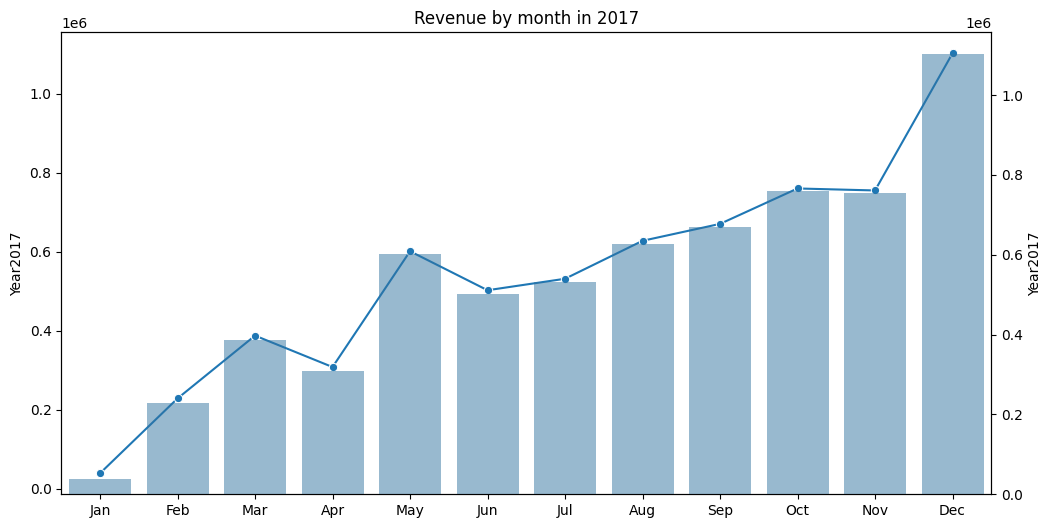

In [16]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

In [17]:
plot_top_10_revenue_categories(top_10_revenue_categories)

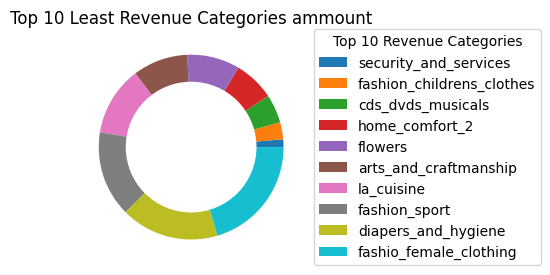

In [18]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [19]:
plot_revenue_per_state(revenue_per_state)

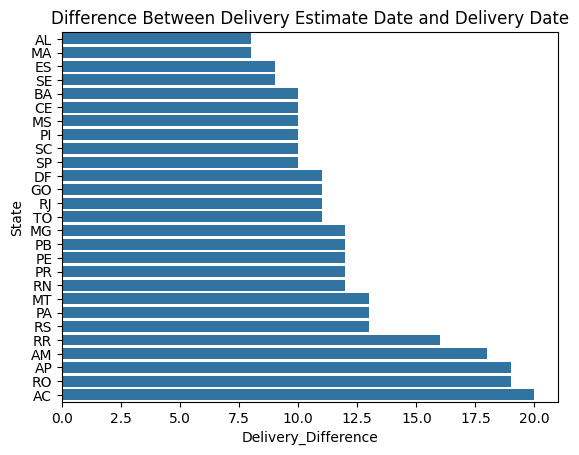

In [20]:
plot_delivery_date_difference(delivery_date_difference)


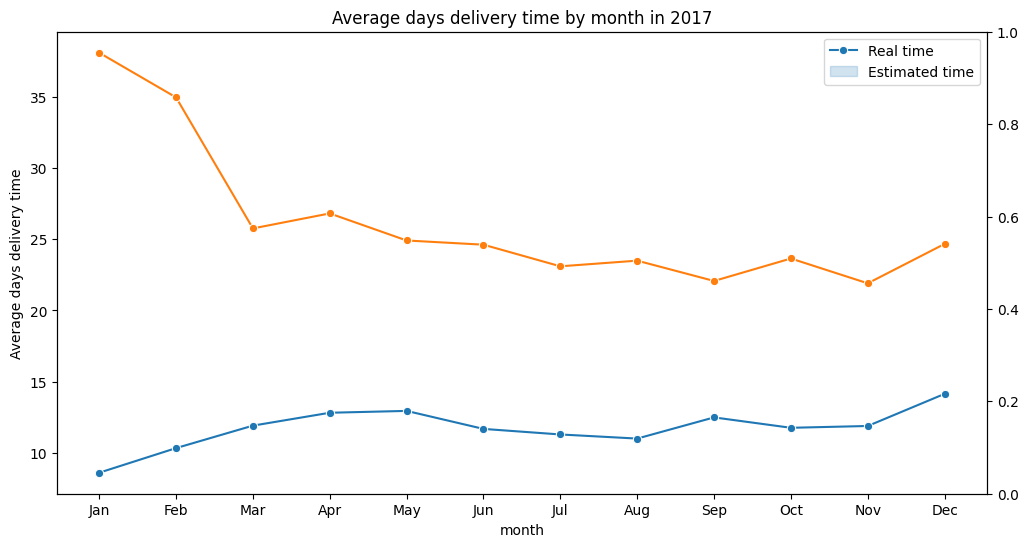

In [21]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

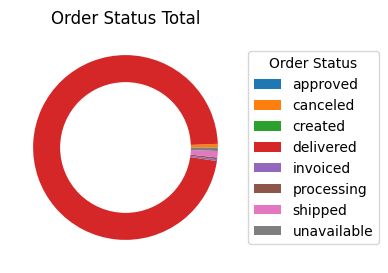

In [22]:
plot_global_amount_order_status(global_ammount_order_status)

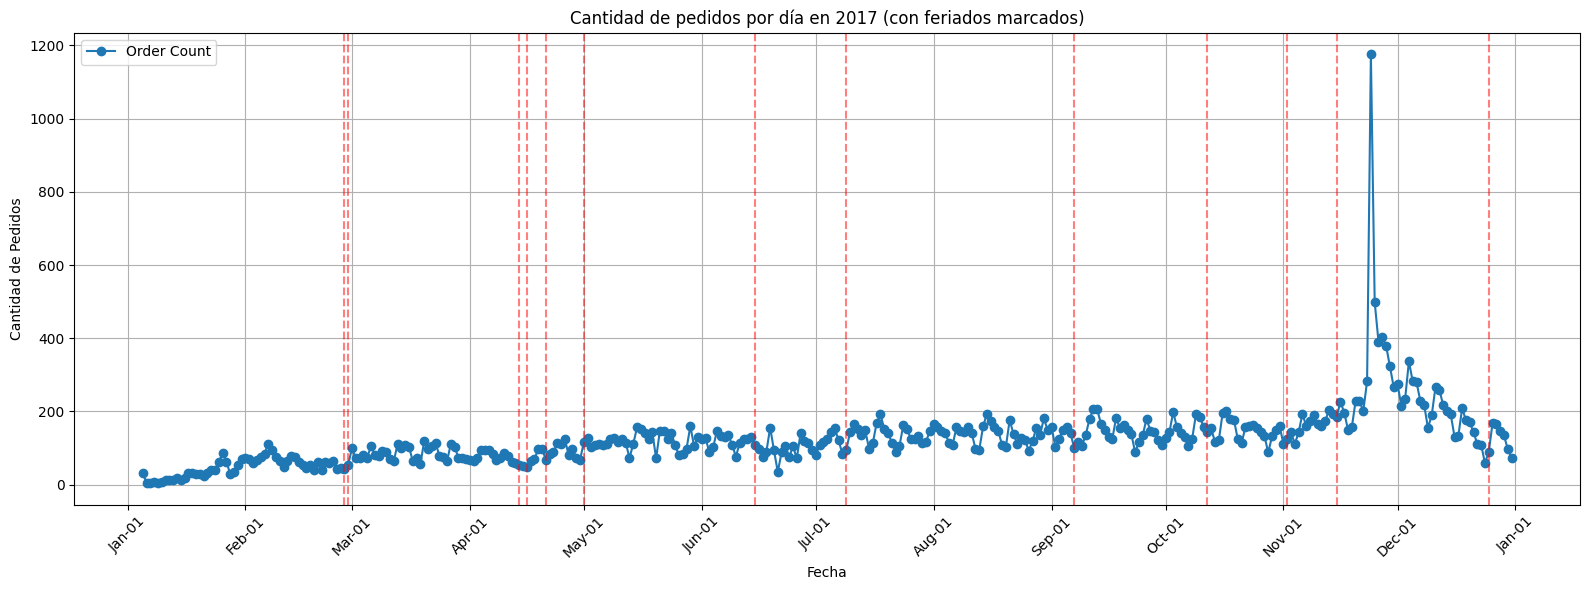

In [23]:
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays)

The Orders per Day and Holidays plot you will code in src/plots.py has to be similar to this:

![The plot you will code will be similar to this:](images/orders_per_day_and_holidays.png "Orders per Day and Holidays")

4.1 Do you see any relationship between the Brazilian public holidays of 2017 and that year's purchases?

Yes, there is a relation. On holidays, the number of purchases is low. But some days before, we see a high peak in orders. December is the month with the most purchases, because it has the most important holidays and celebrations of the year.

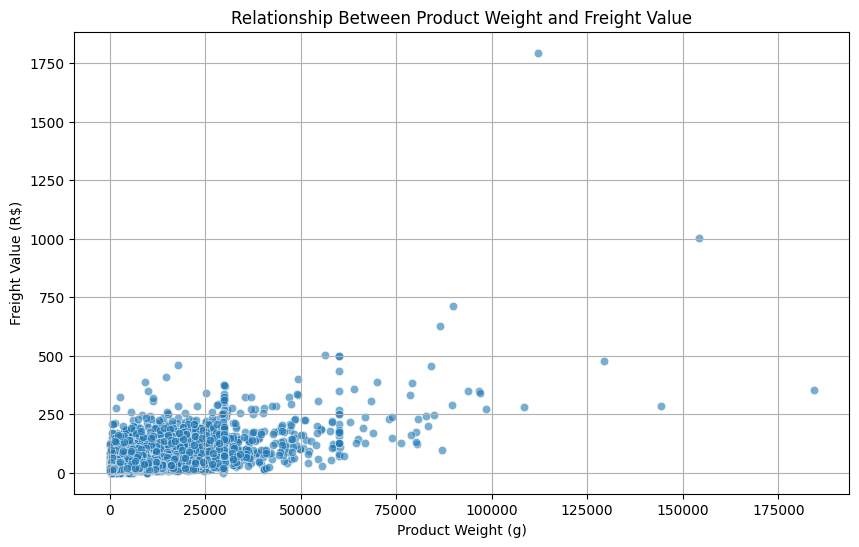

In [24]:
plot_freight_value_weight_relationship(freight_value_weight_relationship)

The Freight Value and Weight Relationship plot you will code in src/plots.py has to be similar to this:

![The plot you will code will be similar to this:](images/freight_value_weight_relationship.png "Freight Value and Weight Relationship")

4.2 Do you see any correlation between the freight value and the product weight?

Yes, we can see a positive correlation between product weight and freight value.
When the product is heavier, the freight cost is usually higher.
But not all points follow this rule exactly.
Some light products have high freight, and some heavy products have low freight.
This means there are other factors that can change the shipping cost, like distance, product type, or transport logistics.